In [1]:
from utils.bert import *
import json
import torch
from torch import nn
from transformers import BertTokenizer
from transformers import BertForSequenceClassification
from transformers import AdamW
from sklearn.model_selection import train_test_split
import logging
#logging.basicConfig(level=logging.ERROR)
logging.getLogger("transformers.modeling_utils").setLevel(logging.ERROR)

In [2]:
NUM_CATEGORIES = 5

categories = set()
all_data = []

with open('News_Category_Dataset_v2.json') as f:
    lines = f.readlines()
    for line in lines:
        data = json.loads(line)
        all_data.append(data)
        categories.add(data['category'])

sentences = []
labels = []

for data in all_data:
    sentences.append(data['headline'])
    labels.append(data['category'])
    
cat2idx = {k: v for v, k in enumerate(categories)}

In [3]:
data_manager = DataManager(sentences, labels)
sentences, labels, cat2idx = data_manager.get_data_by_frequency(sentences, labels, NUM_CATEGORIES)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [4]:
X = sentences
y = [cat2idx[label] for label in labels]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [5]:
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=NUM_CATEGORIES).cuda()
criterion = nn.CrossEntropyLoss()
optimizer = AdamW(model.parameters(), lr=1e-5, weight_decay=0.01)
summary = train_and_evaluate(model, criterion, accuracy, optimizer, X_train, y_train, 
                             X_val, y_val, tokenizer, max_len=64, batch_size=128, n_epochs=5)

start training: 
--------------------------------------------------
epoch  1 :
train loss: 0.2918; train acc: 0.8513
eval loss: 0.2771; eval acc: 0.9133
--------------------------------------------------
epoch  2 :
train loss: 0.2257; train acc: 0.9265
eval loss: 0.2579; eval acc: 0.9198
--------------------------------------------------
epoch  3 :
train loss: 0.1889; train acc: 0.9433
eval loss: 0.2523; eval acc: 0.9230
--------------------------------------------------
epoch  4 :
train loss: 0.1642; train acc: 0.9529
eval loss: 0.2516; eval acc: 0.9242
--------------------------------------------------
epoch  5 :
train loss: 0.1462; train acc: 0.9590
eval loss: 0.2542; eval acc: 0.9239
--------------------------------------------------
finish training.


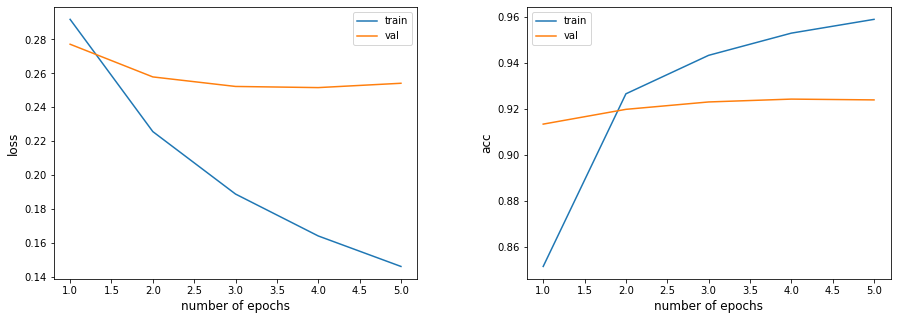

In [6]:
plot_summary(summary)

In [7]:
test(model, criterion, accuracy, X_test, y_test, tokenizer, max_len=64, batch_size=32)

test loss: 0.2444; test acc: 0.9262
